In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gumla
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | srandakan
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | port blair
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | novo aripuana
Processing Record 17 of Set 1 | mae hong son
Processing Record 18 of Set 1 | saleaula
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | prnjavor
Processing Record 21 of

Processing Record 37 of Set 4 | teya
Processing Record 38 of Set 4 | san carlos del zulia
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | dali
Processing Record 42 of Set 4 | marcona
City not found. Skipping...
Processing Record 43 of Set 4 | ambon
Processing Record 44 of Set 4 | saint-ambroise
Processing Record 45 of Set 4 | tessalit
Processing Record 46 of Set 4 | puerto del rosario
Processing Record 47 of Set 4 | tabou
Processing Record 48 of Set 4 | avera
Processing Record 49 of Set 4 | ylojarvi
Processing Record 50 of Set 4 | guerrero negro
Processing Record 1 of Set 5 | mlyniv
Processing Record 2 of Set 5 | letterkenny
Processing Record 3 of Set 5 | bhadasar
Processing Record 4 of Set 5 | iracoubo
Processing Record 5 of Set 5 | coihaique
Processing Record 6 of Set 5 | apiai
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | coronado
Processing Record 9 of Set 5 | 

Processing Record 25 of Set 8 | san rafael del sur
Processing Record 26 of Set 8 | sassandra
Processing Record 27 of Set 8 | ekibastuz
Processing Record 28 of Set 8 | abha
Processing Record 29 of Set 8 | meulaboh
Processing Record 30 of Set 8 | kiknur
Processing Record 31 of Set 8 | adet
Processing Record 32 of Set 8 | chuy
Processing Record 33 of Set 8 | batemans bay
Processing Record 34 of Set 8 | chebenki
Processing Record 35 of Set 8 | scalloway
City not found. Skipping...
Processing Record 36 of Set 8 | west wendover
Processing Record 37 of Set 8 | tefe
Processing Record 38 of Set 8 | purpe
Processing Record 39 of Set 8 | havoysund
Processing Record 40 of Set 8 | krasnoselkup
Processing Record 41 of Set 8 | santiago del estero
Processing Record 42 of Set 8 | bonfim
Processing Record 43 of Set 8 | majene
Processing Record 44 of Set 8 | nha trang
Processing Record 45 of Set 8 | belaya gora
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | natalicio talavera
Pr

Processing Record 11 of Set 12 | cortez
Processing Record 12 of Set 12 | buckeye
Processing Record 13 of Set 12 | dudinka
Processing Record 14 of Set 12 | mackay
Processing Record 15 of Set 12 | thohoyandou
Processing Record 16 of Set 12 | slave lake
Processing Record 17 of Set 12 | elko
Processing Record 18 of Set 12 | tagusao
Processing Record 19 of Set 12 | goba
Processing Record 20 of Set 12 | general pico
Processing Record 21 of Set 12 | lujan
Processing Record 22 of Set 12 | ruteng
Processing Record 23 of Set 12 | mananara
Processing Record 24 of Set 12 | kuala krai
City not found. Skipping...
Processing Record 25 of Set 12 | biak
Processing Record 26 of Set 12 | narbonne
Processing Record 27 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 28 of Set 12 | grajau
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | college
Processing Record 31 of Set 12 | ixtapa
Processing Record 32 of Set 12 | preobrazheniye
Processing Record 33 of Set 12 |

In [11]:
len(city_data)

567

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gumla,23.05,84.55,71.91,91,76,4.09,IN,2020-10-13 18:22:38
1,Cherskiy,68.75,161.30,30.15,89,98,12.57,RU,2020-10-13 18:22:39
2,Upernavik,72.79,-56.15,25.27,94,0,10.58,GL,2020-10-13 18:22:39
3,Srandakan,-7.94,110.25,77.00,78,97,5.77,ID,2020-10-13 18:22:39
4,Ushuaia,-54.80,-68.30,48.20,36,75,20.80,AR,2020-10-13 18:18:50
5,Atuona,-9.80,-139.03,78.08,73,47,18.21,PF,2020-10-13 18:22:40
6,Yellowknife,62.46,-114.35,25.00,62,75,25.28,CA,2020-10-13 18:22:40
7,Hilo,19.73,-155.09,77.00,73,90,6.93,US,2020-10-13 18:18:15
8,Port Elizabeth,-33.92,25.57,57.20,76,6,16.11,ZA,2020-10-13 18:22:41
9,Port Blair,11.67,92.75,80.40,84,98,13.38,IN,2020-10-13 18:19:59


In [13]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gumla,IN,2020-10-13 18:22:38,23.05,84.55,71.91,91,76,4.09
1,Cherskiy,RU,2020-10-13 18:22:39,68.75,161.30,30.15,89,98,12.57
2,Upernavik,GL,2020-10-13 18:22:39,72.79,-56.15,25.27,94,0,10.58
3,Srandakan,ID,2020-10-13 18:22:39,-7.94,110.25,77.00,78,97,5.77
4,Ushuaia,AR,2020-10-13 18:18:50,-54.80,-68.30,48.20,36,75,20.80


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time

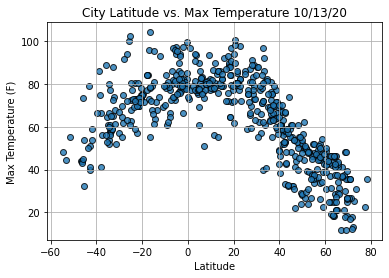

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

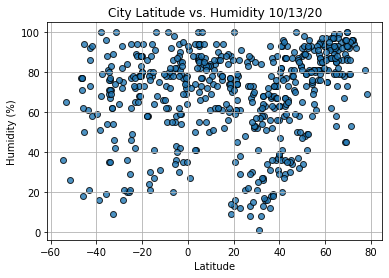

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

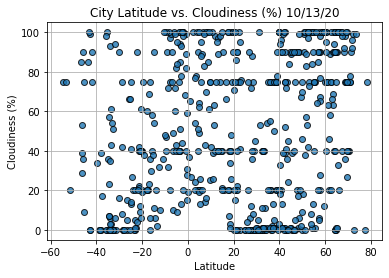

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

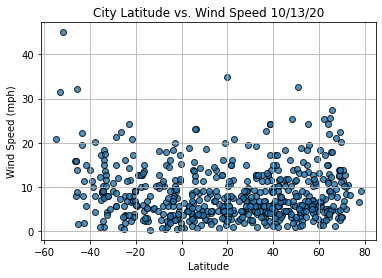

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()